Linear Regression
Y = wX + b

-> Gradient descent: optimization algorithm for minimizing Loss function. used for updating the parameters of the learning model

-> Loss function: measures how far the model is from the real data. The goal is to minimize the loss function.

-> Learning rate: the step size of the gradient descent algorithm. A small learning rate will result in a slow convergence, while a large learning rate will result in a fast convergence but may lead to overshooting the minimum. The learning rate is usually set to a small value, such as 0.

w = w - L(dw)
b = b - L(db)

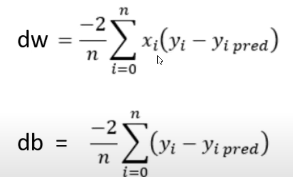 

In [44]:
#importing numpy library
import numpy as np

**Linear Regression**

In [45]:
class Linear_Regression():

#initiating the parameters (learning rate and no of iterations)
    def __init__(self, learning_rate, no_of_iterations): #no of iterations (Epoch rate)
        
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):

        #number of training examples and number of features
        # (number of rows and columns)
        self.m, self.n = X.shape

        #inititating the weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing Gradient Descent

        for i in range(self.no_of_iterations):
            self.update_weights()
    
    def update_weights(self):

        Y_prediction = self.predict(self.X)

        # Calculate gradients

        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction))/ self.m

        db = - (2 * np.sum(self.Y - Y_prediction))/self.m

        # updating the weights

        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db

    def predict(self, X):

        return X.dot(self.w) + self.b     # Y= wX + b

Using Linear Regression model for Prediction

In [71]:
#importing dependencies

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import Lin_Reg_model as LR

Data Preprocessing

In [47]:
# Loading the data fromcsv file to a pandas dataframe

salary_data = pd.read_csv('salary.csv')

# Printing the first 5 rows of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [48]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [49]:
# number of rows and columns in the df
salary_data.shape

(30, 2)

In [50]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the feature and target variables

In [51]:
X =salary_data.iloc[:,:-1].values
Y =  salary_data.iloc[:, 1].values

In [52]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [53]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into Training and Test dataset


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state= 2)

print(X.shape, X_train.shape, X_test.shape)

(30, 1) (20, 1) (10, 1)


Training the Linear Regression Model


In [72]:
model = LR.Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)

In [73]:
model.fit(X_train, Y_train)

In [74]:
# printing the parameter values (weights & biases )

print('weight = ',model.w[0])
print('bias = ', model.b)

weight =  9514.400999035135
bias =  23697.406507136307


y = 9514(x) + 23697

salary = 9514(experience) + 23697

Predict the salary value for Test data

In [75]:
test_data_prediction = model.predict(X_test)

In [76]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted values and actual values

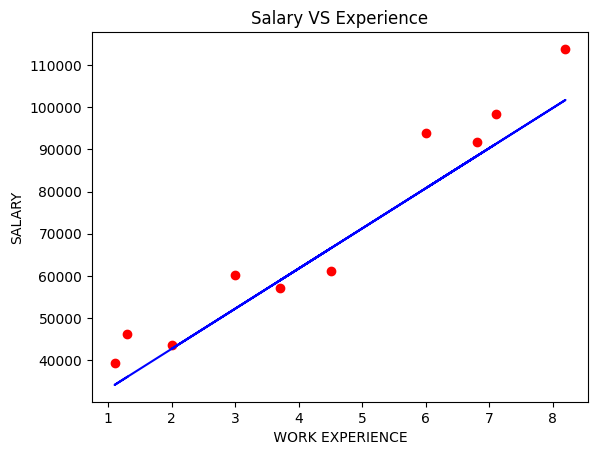

In [77]:
plt.scatter(X_test,Y_test, color = 'red')
plt.plot(X_test, test_data_prediction, color = 'blue')
plt.xlabel(' WORK EXPERIENCE ')
plt.ylabel('SALARY')
plt.title('Salary VS Experience')
plt.show()